In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
y_df = pd.DataFrame(data = iris.target, columns = ['species'])
display(X_df.head())
'''
0 --> Setosa
1 --> Versicolor
2 --> Virginica
'''
display(y_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,species
0,0
1,0
2,0
3,0
4,0


In [3]:
display(X_df.info())
print("-"*60)
display(y_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


None

------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   species  150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


None

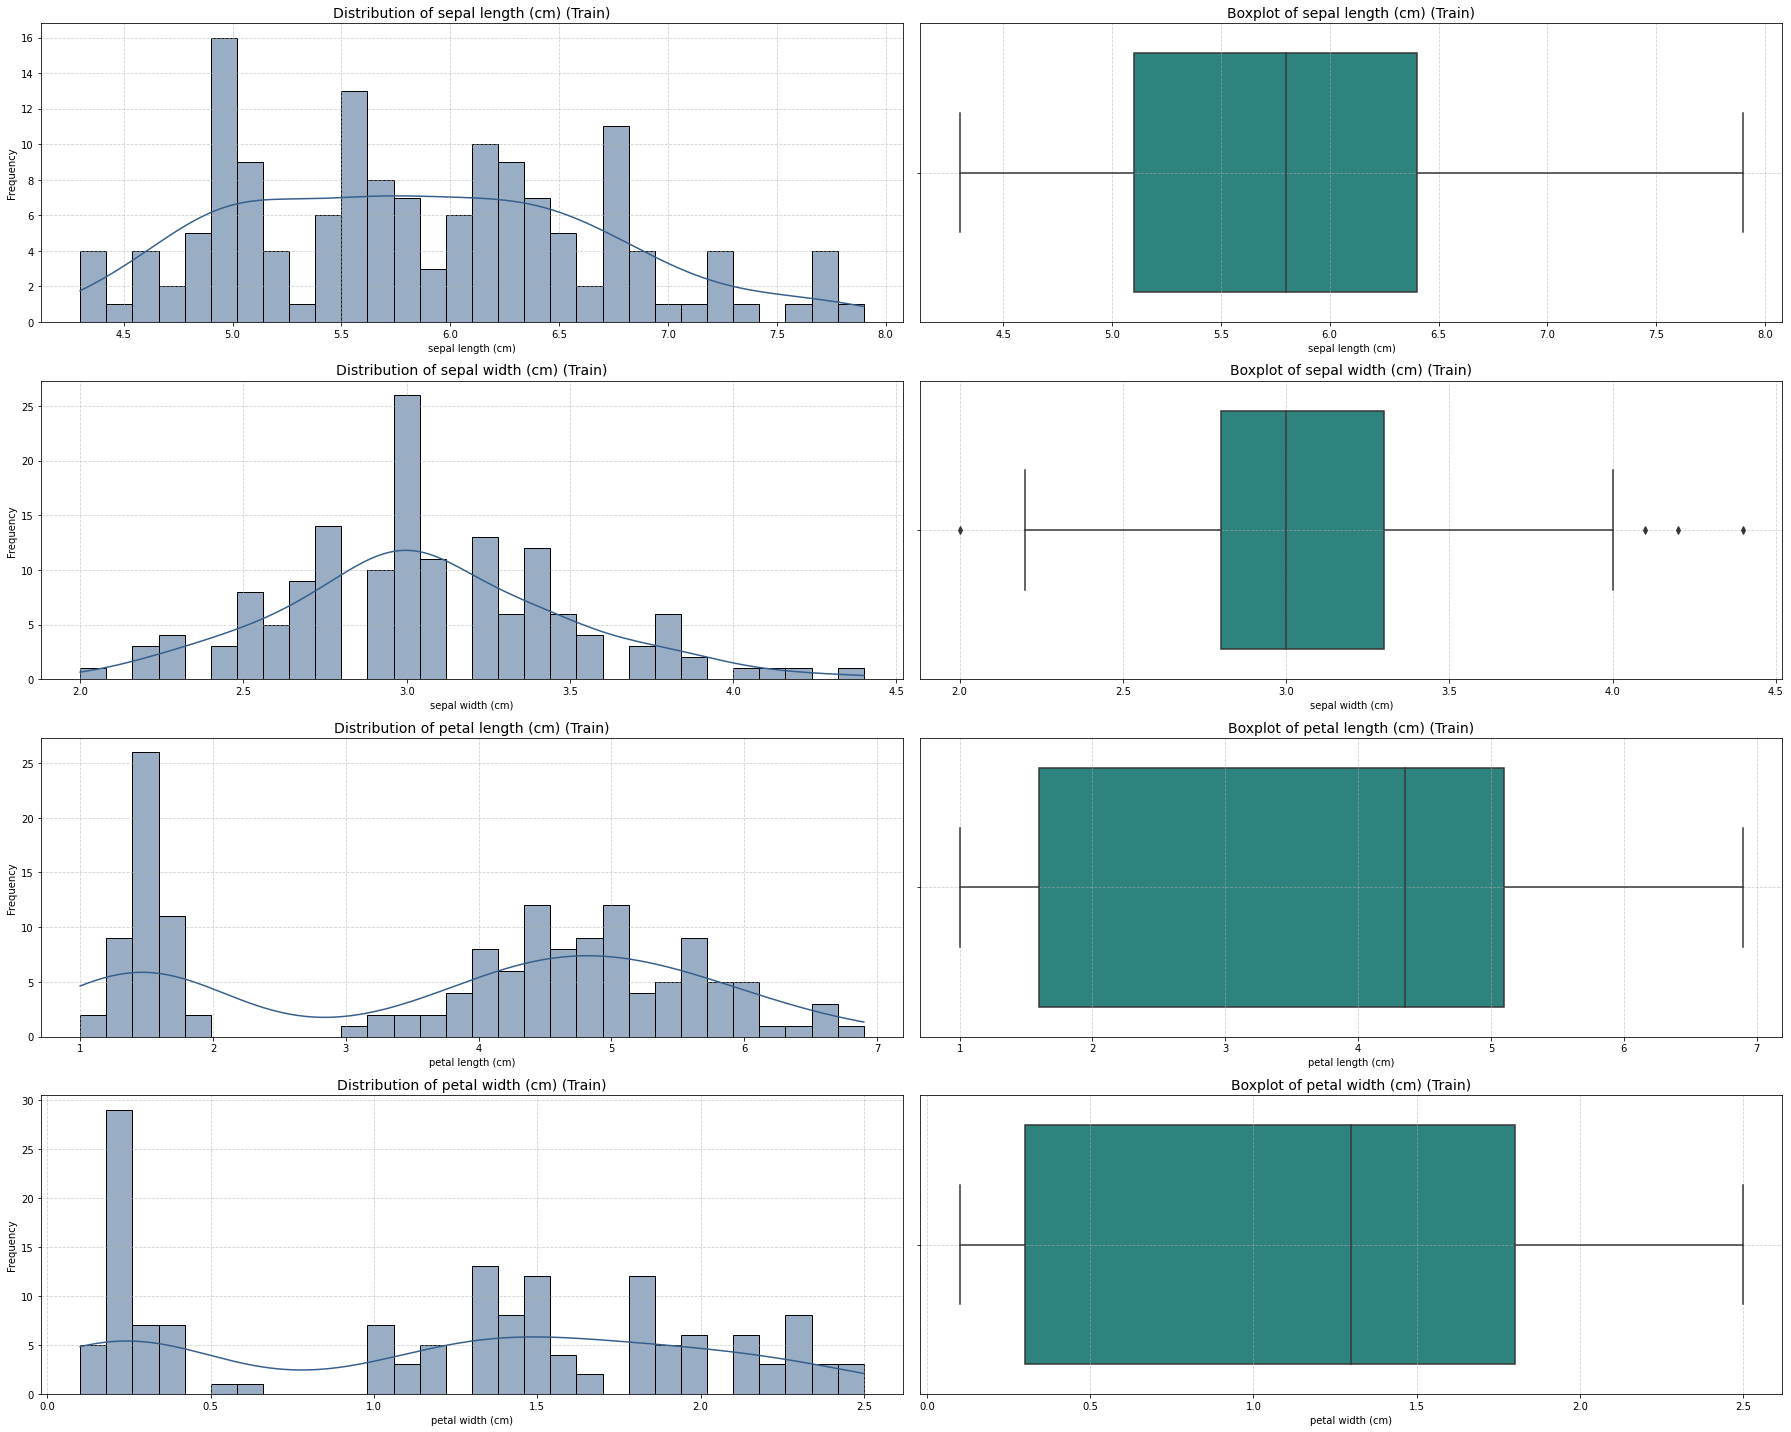

In [4]:
from matplotlib import cm
import seaborn as sns
# Define columns to analyze
columns_to_analyze = X_df.select_dtypes(include=['number']).columns

viridis_cmap = cm.get_cmap("viridis")
# Extract three colors from the colormap
viridis_colors = [viridis_cmap(0.3), viridis_cmap(0.5), viridis_cmap(0.8)]

fig, axes = plt.subplots(len(columns_to_analyze), 2, figsize=(25, len(columns_to_analyze) * 5))

for i, column in enumerate(columns_to_analyze):
    # Histogram for train_data
    sns.histplot(X_df[column], bins=30, kde=True, color=viridis_colors[0], ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} (Train)', fontsize=14)
    axes[i, 0].set_xlabel(column, fontsize=10)
    axes[i, 0].set_ylabel('Frequency', fontsize=10)
    axes[i, 0].grid(visible=True, linestyle='--', alpha=0.6)

    # Boxplot for train_data
    sns.boxplot(x=X_df[column], color=viridis_colors[1], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column} (Train)', fontsize=14)
    axes[i, 1].set_xlabel(column, fontsize=10)
    axes[i, 1].grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


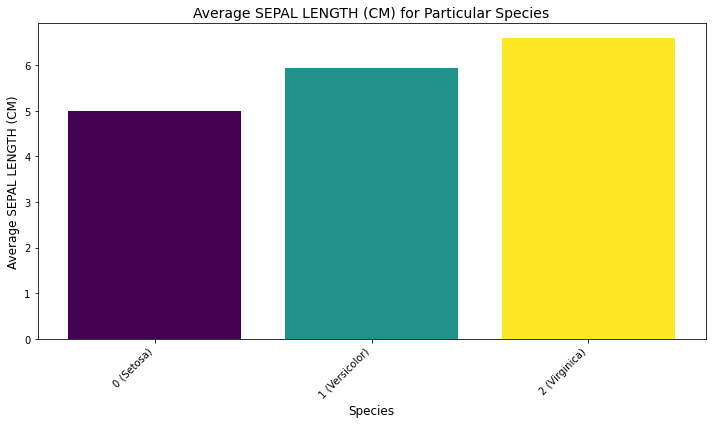

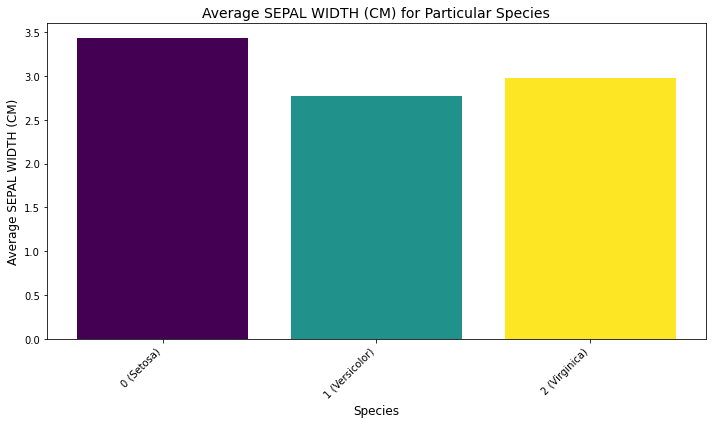

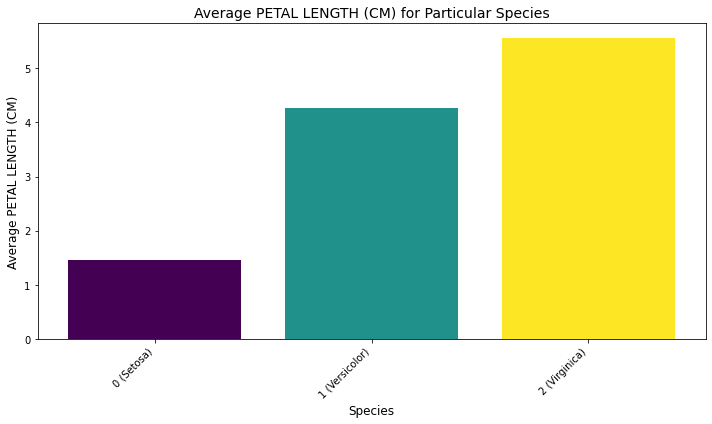

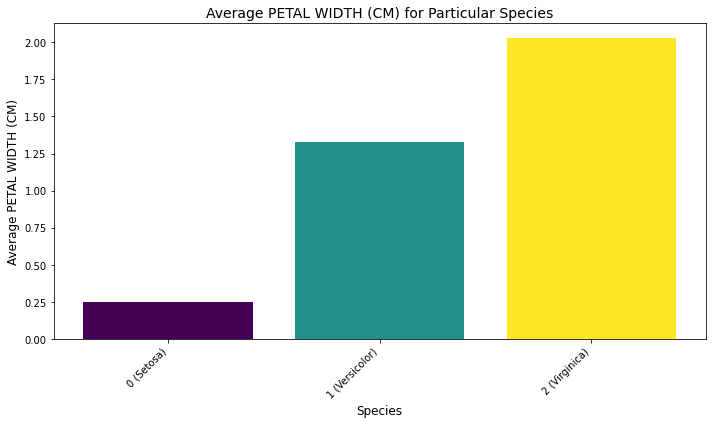

In [5]:
import numpy as np
from matplotlib.cm import viridis
import matplotlib.pyplot as plt

# Combine and shuffle data
iris_df = pd.concat([X_df, y_df], axis=1).sample(frac=1).reset_index(drop=True)

# Map species names to numbers
species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris_df['species'] = iris_df['species'].map(species_mapping)

# Validate if mapping was successful
if iris_df['species'].isnull().any():
    raise ValueError("Mapping failed! Check if species names match the mapping keys.")

# Get feature columns (excluding 'species')
columns = iris_df.columns[:-1]

# Loop through each feature column
for column in columns:
    # Group by species and compute the mean
    grouped = iris_df.groupby('species')[column].mean().reset_index()

    # Validate if grouped is non-empty
    if grouped.empty:
        raise ValueError(f"Grouping failed for column '{column}'. Check the data.")

    # Create colors for the bars
    num_species = len(grouped['species'])
    viridis_colors = viridis(np.linspace(0, 1, num_species))

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(grouped['species'], grouped[column], color=viridis_colors)

    # Add labels, titles, and customize ticks
    plt.title(f'Average {column.upper()} for Particular Species', fontsize=14)
    plt.ylabel(f'Average {column.upper()}', fontsize=12)
    plt.xlabel('Species', fontsize=12)
    plt.xticks(
        ticks=grouped['species'],  # Locations for x-ticks (0, 1, 2)
        labels=[f"{key} ({value})" for key, value in species_mapping.items()],  # Format: "Setosa (0)"
        rotation=45,
        ha='right'
    )
    plt.tight_layout()
    plt.show()


In [6]:
from sklearn.model_selection import train_test_split

species_mapping = {'Setosa':0 ,'Versicolor': 1, 'Virginica': 2}
iris_df['species'] = iris_df['species'].map(species_mapping)

X = iris_df.drop('species', axis = 1)
y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from src.gridsearch import custom_grid_search_models

models = {"Logistic_Regression" : LogisticRegression(), 
          "SVC" : SVC(),
          "Random_Forest_Classifier": RandomForestClassifier(),
         }
param_grid = {"Logistic_Regression": {'penalty': ['l1', 'l2', 'elasticnet'],
                                      'C': [0.1, 1],
                                      'fit_intercept': [True, False],
                                     },
              "SVC": {'C': [0.1, 1],
                      'kernel': ['linear', 'poly', 'rbf'],
                     },
              "Random_Forest_Classifier": {'n_estimators':[100, 200, 50],
                                           'criterion': ['gini', 'entropy'],
                                          }
             }

best_models = custom_grid_search_models(models, param_grid, X_train.to_numpy(), y_train.to_numpy())
print(best_models)

Initialized MLflow to track repo "Shorya777/ML_Libraries_Comparison"

Repository Shorya777/ML_Libraries_Comparison initialized!

Training Logistic_Regression...
Training model 1/12 with params: {'penalty': 'l1', 'C': 0.1, 'fit_intercept': True}
Error with params {'penalty': 'l1', 'C': 0.1, 'fit_intercept': True} during fold 0: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Training model 2/12 with params: {'penalty': 'l1', 'C': 0.1, 'fit_intercept': False}
Error with params {'penalty': 'l1', 'C': 0.1, 'fit_intercept': False} during fold 0: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Training model 3/12 with params: {'penalty': 'l1', 'C': 1, 'fit_intercept': True}
Error with params {'penalty': 'l1', 'C': 1, 'fit_intercept': True} during fold 0: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Training model 4/12 with params: {'penalty': 'l1', 'C': 1, 'fit_intercept': False}
Error with params {'penalty': 'l1', 'C': 1, 'fit_intercept': False} during fold 0: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Training model 5/12 with params: